In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
import logging
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df_raw=pd.read_excel(r"C:\Users\Shaaf\Desktop\Data Science\Practice Projects\Agriculture Price Prediction\Data\Agmarknet_Price_Report (2).xlsx")

In [3]:
df_raw['Price Date']=pd.to_datetime(df_raw['Price Date'])

In [4]:
df_raw

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Bangalore,Bangalore,Ginger(Green),Green Ginger,FAQ,160,6830,5500,2013-04-17
1,2,Bangalore,Bangalore,Ginger(Green),Green Ginger,FAQ,180,2000,1900,2023-02-06
2,3,Bangalore,Bangalore,Ginger(Green),Green Ginger,FAQ,200,3500,2830,2013-02-25
3,4,Bangalore,Bangalore,Ginger(Green),Green Ginger,FAQ,200,3840,2920,2016-08-12
4,5,Bangalore,Bangalore,Ginger(Green),Green Ginger,FAQ,460,916,750,2012-05-18
...,...,...,...,...,...,...,...,...,...,...
3477,3478,Bangalore,Bangalore,Ginger(Green),Green Ginger,Medium,6500,11000,9200,2014-04-22
3478,3479,Bangalore,Bangalore,Ginger(Green),Green Ginger,Medium,7200,10500,9000,2014-04-23
3479,3480,Bangalore,Bangalore,Ginger(Green),Green Ginger,Medium,7200,10500,9000,2014-04-24
3480,3481,Bangalore,Bangalore,Ginger(Green),Green Ginger,Ref grade-1,1500,2000,1800,2025-02-04


In [5]:
df_raw.sort_values(by='Price Date', inplace=True)

In [6]:
df_raw.dtypes

Sl no.                                int64
District Name                        object
Market Name                          object
Commodity                            object
Variety                              object
Grade                                object
Min Price (Rs./Quintal)               int64
Max Price (Rs./Quintal)               int64
Modal Price (Rs./Quintal)             int64
Price Date                   datetime64[ns]
dtype: object

In [7]:
df_raw.set_index('Price Date', inplace=True)

In [8]:
df_raw

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Price Date,,,,,,,,,
2011-02-10,1110,Bangalore,Bangalore,Ginger(Green),Green Ginger,FAQ,1500,2000,1800
2011-02-11,862,Bangalore,Bangalore,Ginger(Green),Green Ginger,FAQ,1330,1830,1660
2011-02-14,1089,Bangalore,Bangalore,Ginger(Green),Green Ginger,FAQ,1500,1835,1650
2011-02-15,1090,Bangalore,Bangalore,Ginger(Green),Green Ginger,FAQ,1500,1835,1650
2011-02-17,1091,Bangalore,Bangalore,Ginger(Green),Green Ginger,FAQ,1500,1835,1650
...,...,...,...,...,...,...,...,...,...
2025-02-17,982,Bangalore,Bangalore,Ginger(Green),Green Ginger,FAQ,1400,1800,1500
2025-02-18,1975,Bangalore,Bangalore,Ginger(Green),Green Ginger,FAQ,2500,3000,2700
2025-02-19,1976,Bangalore,Bangalore,Ginger(Green),Green Ginger,FAQ,2500,3000,2700


In [9]:
df_resampled=df_raw['Modal Price (Rs./Quintal)']
df_resampled=df_resampled.resample('M').mean()  


C:\Users\Shaaf\AppData\Local\Temp\ipykernel_27012\1575019841.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled=df_resampled.resample('M').mean()


In [10]:
df_resampled

Price Date
2011-02-28    1608.461538
2011-03-31    1601.250000
2011-04-30    1612.000000
2011-05-31    1602.500000
2011-06-30    1691.440000
                 ...     
2024-10-31    2461.111111
2024-11-30    1500.000000
2024-12-31    2286.666667
2025-01-31    2036.363636
2025-02-28    2010.000000
Freq: ME, Name: Modal Price (Rs./Quintal), Length: 169, dtype: float64

In [11]:
df_resampled.isnull().sum()

3

In [12]:
df_resampled.fillna(method='ffill', inplace=True)

C:\Users\Shaaf\AppData\Local\Temp\ipykernel_27012\740798793.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled.fillna(method='ffill', inplace=True)


Text(0.5, 0, 'Date')

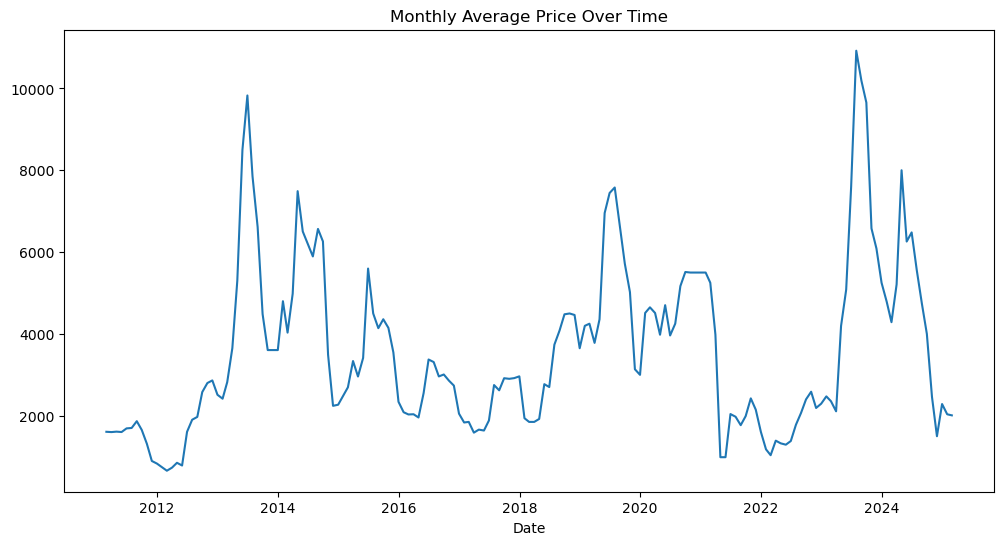

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df_resampled, label='Monthly Average Price')   
plt.title('Monthly Average Price Over Time')
plt.xlabel('Date')

In [14]:
seasonal_decompose(df_resampled, model='additive').plot()
plt.show()

KeyboardInterrupt: 

In [ ]:
adfuller(df_resampled)

(-2.536499051782003,
 0.10684434478363519,
 6,
 162,
 {'1%': -3.471374345647024,
  '5%': -2.8795521079291966,
  '10%': -2.5763733302850174},
 2528.867121096521)

In [ ]:
df_resampled['First Difference'] = df_resampled - df_resampled.shift(1)

In [ ]:
adfuller(df_resampled['First Difference'].dropna())

(-8.381778264312839,
 2.498869642205592e-13,
 5,
 162,
 {'1%': -3.471374345647024,
  '5%': -2.8795521079291966,
  '10%': -2.5763733302850174},
 2519.3611139848936)

In [ ]:
df_resampled = pd.DataFrame(df_resampled)
df_resampled

,Modal Price (Rs./Quintal)
Price Date,
2011-02-28 00:00:00,1608.461538
2011-03-31 00:00:00,1601.25
2011-04-30 00:00:00,1612.0
2011-05-31 00:00:00,1602.5
2011-06-30 00:00:00,1691.44
...,...
2024-11-30 00:00:00,1500.0
2024-12-31 00:00:00,2286.666667
2025-01-31 00:00:00,2036.363636


In [ ]:
df_resampled.reset_index(inplace=True)
df_resampled.rename(columns={'Price Date': 'Date', 'Modal Price (Rs./Quintal)': 'Price'}, inplace=True)

In [ ]:

df_resampled

,Date,Price
0,2011-02-28 00:00:00,1608.461538
1,2011-03-31 00:00:00,1601.25
2,2011-04-30 00:00:00,1612.0
3,2011-05-31 00:00:00,1602.5
4,2011-06-30 00:00:00,1691.44
...,...,...
165,2024-11-30 00:00:00,1500.0
166,2024-12-31 00:00:00,2286.666667
167,2025-01-31 00:00:00,2036.363636
168,2025-02-28 00:00:00,2010.0


In [ ]:
df_resampled.dtypes

Price    float64
dtype: object

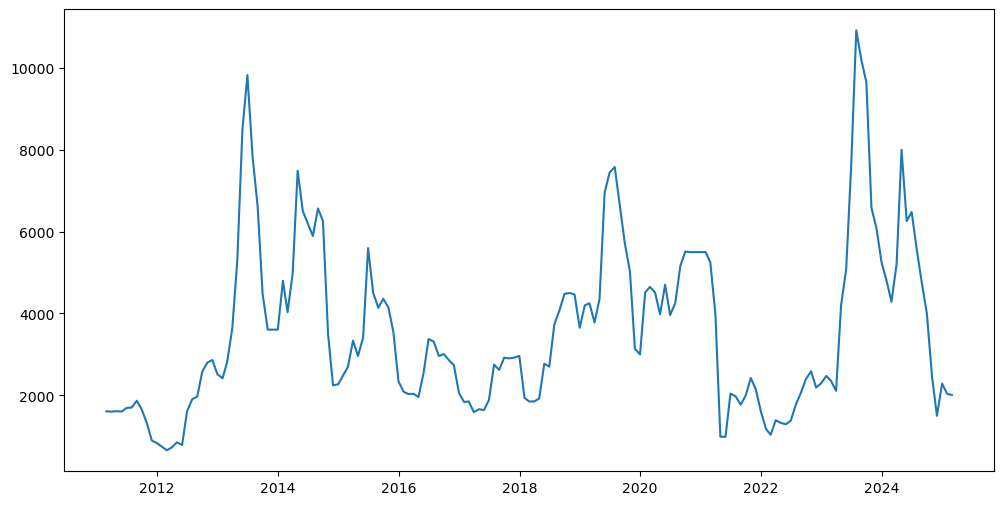

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_resampled, label='Monthly Average Price')

In [ ]:
pmd_auto_arima_model = pm.auto_arima(df_resampled['Price'], seasonal=True, m=12, trace=True,
                                    error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2775.382, Time=0.67 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3063.273, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2790.154, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2891.157, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3295.102, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=2773.574, Time=0.67 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=2773.642, Time=0.24 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=2775.457, Time=1.18 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=2774.010, Time=0.63 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=2777.380, Time=1.91 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=2773.243, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=2773.777, Time=0.07 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=2774.980, Time=0.34 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=2775.242, Time=0.49 sec
 ARIMA(1,0,2)(1,0,0

In [ ]:
SARIMAX_model = SARIMAX(df_resampled['Price'], order=(2,1,0),
                        seasonal_order=pmd_auto_arima_model.seasonal_order)
SARIMAX_model_fit = SARIMAX_model.fit(disp=False)
print(SARIMAX_model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Price   No. Observations:                  169
Model:             SARIMAX(2, 1, 0)x(0, 0, [1], 12)   Log Likelihood               -1378.962
Date:                              Wed, 10 Sep 2025   AIC                           2765.923
Time:                                      17:13:06   BIC                           2778.419
Sample:                                  02-28-2011   HQIC                          2770.995
                                       - 02-28-2025                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3067      0.073      4.193      0.000       0.163       0.450
ar.L2         -0.08

c:\Users\Shaaf\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Shaaf\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [ ]:
from prophet import Prophet

In [ ]:
#date offset


Text(0.5, 1.0, 'Monthly Average Price Over Time')

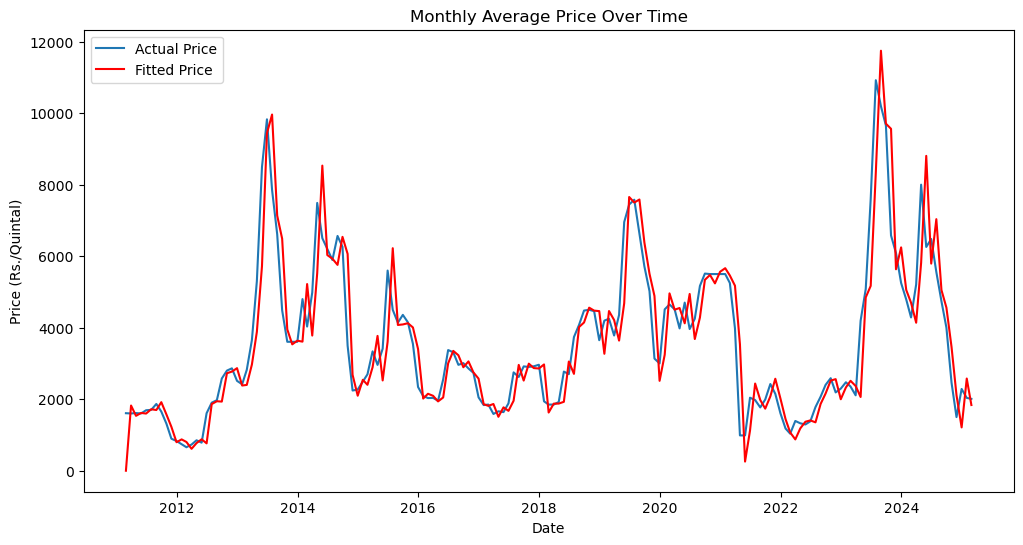

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_resampled, label='Actual Price')
plt.plot(SARIMAX_model_fit.fittedvalues, color='red', label='Fitted Price')
plt.legend()
plt.ylabel('Price (Rs./Quintal)')
plt.xlabel('Date')   
plt.title('Monthly Average Price Over Time')

In [ ]:
df_prophet=df_resampled.copy()

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select
import pandas as pd
import time
import tempfile

# Create a temporary Chrome profile folder
temp_profile = tempfile.mkdtemp()

# Setup Chrome options
chrome_options = Options()
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument(f"--user-data-dir={temp_profile}")  # unique user data directory
chrome_options.add_argument("--disable-blink-features=AutomationControlled")

# Launch Chrome
driver = webdriver.Chrome(options=chrome_options)

# Open Agmarknet
driver.get("https://agmarknet.gov.in/")

# ---- Select dropdown values ----
commodity = Select(driver.find_element("id", "ddlCommodity"))
commodity.select_by_visible_text("Ginger(Green)")

state = Select(driver.find_element("id", "ddlState"))
state.select_by_visible_text("Karnataka")

district = Select(driver.find_element("id", "ddlDistrict"))
district.select_by_visible_text("Bangalore")

market = Select(driver.find_element("id", "ddlMarket"))
market.select_by_visible_text("Bangalore")

# Enter date range
driver.find_element("id", "txtDate").clear()
driver.find_element("id", "txtDate").send_keys("01-Jan-2010")

driver.find_element("id", "txtDateTo").clear()
driver.find_element("id", "txtDateTo").send_keys("09-Sep-2025")

# Click search
driver.find_element("id", "btnGo").click()

time.sleep(5)  # wait for table to load

# ---- Extract results into pandas ----
tables = pd.read_html(driver.page_source)
df = tables[0]

# Save results
df.to_excel("agmarknet_data.xlsx", index=False)

print("Data saved to agmarknet_data.xlsx")
print(df.head())

driver.quit()
